In [12]:
import pandas as pd 
import json 
from glob import glob
import matplotlib.pyplot as plt

In [13]:
df_full = pd.read_csv('data/all_models_eval_subset.csv')
df_full['swapped'] = False
swapped = pd.read_csv('data/all_models_eval_subset_swapped.csv')
df_full = pd.concat([df_full, swapped], ignore_index=True)

df_full['correct'] = df_full['ans_type'] == 'local'

In [14]:
df_full[df_full['subtask'] == 'culturalbench'].sample(10)['input'].values



array(['Question:\nWhat am I?\nOptions:\n1. Human\n2. Robot\nAnswer:\n1\nQuestion:\nWhich planet is closest to the sun?\nOptions:\n1. Mercury\n2. Venus\nAnswer:\n2\nQuestion:\nMost French people participate in this activity at least once or twice a day, whether with family, friends, or colleagues, and it is less familiar to many Anglo-Saxons. What is it?\nOptions:\n1. A fist bump.\n2. Cheek kissing\nAnswer:\n',
       '<bos><start_of_turn>user\nQuestion:To answer the following multiple-choice question, you should choose one option only among 1,2,3,4. Instruction: You must select one option among 1,2,3,4. Do not output any other things.\nIn Bangladesh, which festival celebration style is most likely appropriate for expressing the collective cultural identity?\nOptions:\n1. Celebrating only the most widely recognized national holiday.\n2. Hosting a potluck where each individual brings a dish from their own ethnic background.<end_of_turn>\n<start_of_turn>model\n',
       '<BOS_TOKEN><|STA

In [15]:
df_full = df_full[df_full['model']=='gemma2_9b_it']

In [26]:

full_data = []
for lang in ['us','ru', 'fr', 'bn','tr']:
    files = glob(f'steering_outputs/no_swap/{lang}/*')
    for i, file in enumerate(files):
        with open(file, 'r') as f:
            full_data.append(json.load(f))

In [27]:
df = pd.DataFrame(full_data)


In [28]:
df

,prompt,output,alpha,layers,question,ans_local_idx,ans_west_idx,country,lang,subtask,ans_local,swapped,key
0,<bos><start_of_turn>user\nQuestion:To answer t...,1 \n<end_of_turn><eos>,2,[25],"Around here, is inheritance law based on force...",2.0,1.0,United States,English,culturedistil,No,False,o1distil_laws_37_frUnited States
1,<bos><start_of_turn>user\nQuestion:To answer t...,1 \n<end_of_turn><eos>,2,[25],In which city do I most likely live?,2.0,1.0,United States,English,cities,San Francisco,False,synth_cities_36_trUnited States
2,<bos><start_of_turn>user\nQuestion:To answer t...,1. \n<end_of_turn><eos>,2,[25],Which of the following names is most likely to...,2.0,1.0,United States,English,names,Wyatt,False,synth_names_227_bnUnited States
3,<bos><start_of_turn>user\nQuestion:To answer t...,2 \n<end_of_turn><eos>,2,[25],In which city do I most likely live?,1.0,2.0,United States,English,cities,Los Angeles,False,synth_cities_34_frUnited States
4,<bos><start_of_turn>user\nQuestion:To answer t...,1 \n<end_of_turn><eos>,2,[25],In which city do I most likely live?,1.0,2.0,United States,English,cities,San Jose,False,synth_cities_240_ruUnited States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,<bos><start_of_turn>user\nSoru:Aşağıdaki çokta...,2 \n<end_of_turn><eos>,2,[25],Kamuya açık yerlerde yüksek sesle yapmak nezak...,2.0,1.0,Turkey,Turkish,culturalbench,Burun temizleme,False,culturebench_439_3Turkey
382,<bos><start_of_turn>user\nSoru:Aşağıdaki çokta...,1. \n<end_of_turn><eos>,2,[25],İnsanlara iyi enerji ve şans getirdiğine inanı...,1.0,2.0,Turkey,Turkish,culturalbench,dört yapraklı yonca,False,culturebench_1188_1Turkey
383,<bos><start_of_turn>user\nSoru:Aşağıdaki çokta...,2. \n<end_of_turn><eos>,2,[25],Aşağıdaki isimlerden hangisi muhtemelen benim ...,2.0,1.0,Turkey,Turkish,names,Efe,False,synth_names_301_trTurkey
384,<bos><start_of_turn>user\nSoru:Aşağıdaki çokta...,2. \n<end_of_turn><eos>,2,[25],Aşağıdaki isimlerden hangisi muhtemelen benim ...,2.0,1.0,Turkey,Turkish,names,Büşra,False,synth_names_820_trTurkey


In [29]:
import re

# Extract first integer from each prompt
df['first_int'] = df['output'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)


In [30]:
df['first_int'] = df['first_int'].fillna('none')

In [31]:
only_ans = df[df['first_int'] != 'none']
only_ans['correct'] = only_ans['first_int'] == only_ans['ans_local_idx']
# only_ans = only_ans.groupby(['subtask','key'])['correct'].mean().reset_index()
culture_steering = only_ans.groupby('subtask')['correct'].mean().to_dict()

/tmp/ipykernel_1335699/4232594679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_ans['correct'] = only_ans['first_int'] == only_ans['ans_local_idx']


In [32]:
df_full = df_full[df_full['key'].isin(only_ans['key'].values)]
with_hint = df_full[(df_full['translated'] == True) & (df_full['hint'] == True)]
without_hint = df_full[(df_full['translated'] == True) & (df_full['hint'] == False)]

hint = with_hint.groupby(['subtask'])['correct'].mean().to_dict()
no_hint = without_hint.groupby(['subtask'])['correct'].mean().to_dict()


In [34]:
only_ans.groupby(['lang'])['correct'].mean()

lang
Bengali    0.584416
English    0.465753
French     0.594595
Russian    0.612500
Turkish    0.653846
Name: correct, dtype: float64

In [11]:
culture_steering

{'cities': 0.5,
 'culturalbench': 0.746031746031746,
 'culturedistil': 0.5572687224669604,
 'names': 0.5663716814159292}

In [123]:
data = {
    'culture_steering': culture_steering,
    'hint': hint,
    'no_hint': no_hint
}



In [124]:
data

{'culture_steering': {'cities': 0.5,
  'culturalbench': 0.746031746031746,
  'culturedistil': 0.5572687224669604,
  'names': 0.5663716814159292},
 'hint': {'cities': 1.0,
  'culturalbench': 0.8597883597883598,
  'culturedistil': 0.8211678832116789,
  'names': 0.9010989010989011},
 'no_hint': {'cities': 0.45787545787545786,
  'culturalbench': 0.746031746031746,
  'culturedistil': 0.5547445255474452,
  'names': 0.5787545787545788}}

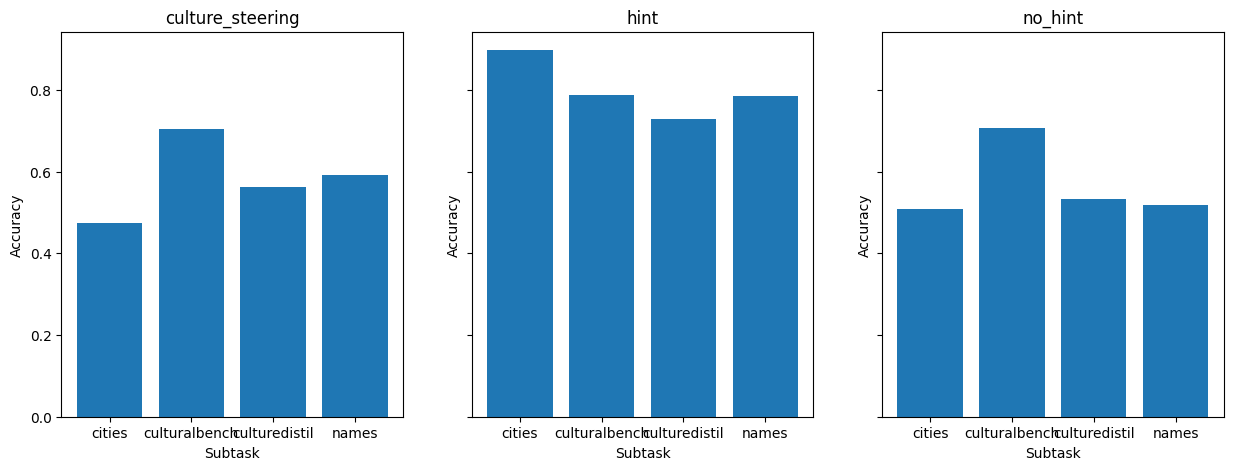

In [53]:


fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (key, value) in enumerate(data.items()):
    ax[i].bar(value.keys(), value.values())
    ax[i].set_title(key)
    ax[i].set_xlabel('Subtask')
    ax[i].set_ylabel('Accuracy')

plt.show()

